# Retrieve the HI4PI Low Resolution Equitorial Image cube and display

The notebook retrieves an image from the HI4PI collaboration.  
This low angular resolution image was kindly provided by Dr. Benjamin Winkel
of the Max Planck Insitute for Radio Astronomy.  

File: langston_eq.fits
* Right Ascension, Declination (J2000) spectral line cube 
* Pixel size of 0.5 deg, smoothed to an angular resolution of 1.5 deg 
* The map projection is Plate Caree (FITS/WCS: CAR)
wget ftp://ftp.mpifr-bonn.mpg.de/outgoing/bwinkel/langston_eq.fits

Glen Langston, NSF - 2022 January 11




First run python commands with already installed code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60
import radio_beam


Upload the Bonn HI4PI cube with 1.5degree resolution

In [2]:
# For Galactic Coordinage image use this file
filename = "hi4pi_1.5deg.fits"
# for Equitorial image use this file
filename = "langston_eq.fits"
fullpath = "ftp://ftp.mpifr-bonn.mpg.de/outgoing/bwinkel/" + filename
#Uncomment the next line if you need a new copy of the file
#!wget {fullpath}

    

In [3]:
from spectral_cube import SpectralCube
import radio_beam
from astropy import units as u

from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from reproject import reproject_interp

Created TAP+ (v20200428.1) - Connection:
	Host: sky.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [4]:
# file location will be different for different environments
# homedir will be different for each user.  Set this to match your site
homedir = "/dlusers/glangsto/"
allsky =  homedir + filename
# most often only the file name is needed, without the directory
allsky = filename
print(allsky)
cube = SpectralCube.read(allsky)  # Initiate a SpectralCube

langston_eq.fits


In [5]:
print(cube)

SpectralCube with shape=(933, 363, 723) and unit=K:
 n_x:    723  type_x: RA---CAR  unit_x: deg    range:          nan deg:         nan deg
 n_y:    363  type_y: DEC--CAR  unit_y: deg    range:          nan deg:         nan deg
 n_s:    933  type_s: VRAD      unit_s: m / s  range:  -600207.218 m / s:  600409.133 m / s


In [6]:
# Get the shape of the cube
shape = cube.shape
ns = shape[0]
nx = shape[1]
ny = shape[2]
middle = int(ns/2)

Now take a look at one velocity channel of the cube

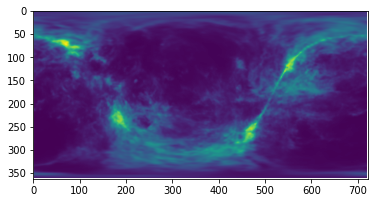

In [7]:
cube[middle, :, :].quicklook()  # Slice the cube along the spectral axis, and display a quick image

In [8]:
#Trim off the very ends of the x,y image to show the coordinates
sub_cube = cube[:,1:nx-1,1:ny-1]

In [9]:
# reduce the size of the image
sub_cube_slab = sub_cube.spectral_slab(-200. *u.km / u.s, 200. *u.km / u.s)

print(sub_cube_slab)

SpectralCube with shape=(311, 361, 721) and unit=K:
 n_x:    721  type_x: RA---CAR  unit_x: deg    range:   180.000000 deg:  180.000000 deg
 n_y:    361  type_y: DEC--CAR  unit_y: deg    range:   -90.000000 deg:   90.000000 deg
 n_s:    311  type_s: VRAD      unit_s: m / s  range:  -199572.363 m / s:  199774.278 m / s


In [10]:
subshape = sub_cube_slab.shape
ns2 = int(subshape[0]/2)
nx2 = int(subshape[1]/2)
ny2 = int(subshape[2]/2)


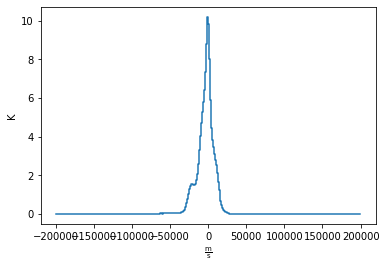

In [11]:
sub_cube_slab[:, nx2, ny2].quicklook()  # Extract a single spectrum through the data cube

In [12]:
# make plots interactive
#%matplotlib widget

In [13]:
# Now save the updated cube for the next step
outname="hi4pi-eq-trim.fits"
sub_cube_slab.write(outname)

# Congratulations!
### You've read and displayed a full sky image of our Milky Way Galaxy!